In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
img_bgr = cv2.imread("C:/Users/akihiro.tanaka.CORP/Downloads/pictures/penguins1.jpg")
h, w = img_bgr.shape[:2]
scale = (640 * 480 / (w * h)) ** 0.8
img_bgr_resize = cv2.resize(img_bgr, dsize=None, fx=scale, fy=scale)
img_rgb = cv2.cvtColor(img_bgr_resize, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_bgr_resize, cv2.COLOR_BGR2GRAY)

In [46]:
img_bgr2 = cv2.imread("C:/Users/akihiro.tanaka.CORP/Downloads/pictures/crione.jpg")
h, w = img_bgr2.shape[:2]
scale = (640 * 480 / (w * h)) ** 0.8
img_bgr_resize2 = cv2.resize(img_bgr2, dsize=None, fx=scale, fy=scale)
img_rgb2 = cv2.cvtColor(img_bgr_resize2, cv2.COLOR_BGR2RGB)
img_gray2 = cv2.cvtColor(img_bgr_resize2, cv2.COLOR_BGR2GRAY)

In [510]:
img_bgr3 = cv2.imread("C:/Users/akihiro.tanaka.CORP/Downloads/pictures/tegaki.jpg")
h, w = img_bgr3.shape[:2]
scale = (640 * 480 / (w * h)) ** 0.5
img_bgr_resize3 = cv2.resize(img_bgr3, dsize=None, fx=scale, fy=scale)
img_rgb3 = cv2.cvtColor(img_bgr_resize3, cv2.COLOR_BGR2RGB)
img_gray3 = cv2.cvtColor(img_bgr_resize3, cv2.COLOR_BGR2GRAY)

# 9-1 2値化
## 9-1-1 2値化の意味
---
例えばグレースケール画像などで、中間値をなくし、白または黒の2値の画像に変換することを**2値化**とよぶ。  
**2値画像**は、例えばある値（**しきい値**）以上の画素値を1、それ未満の画像を0に変換することで得られる。

In [1]:
fig, ax = plt.subplots(2, 4, figsize=(18, 6), subplot_kw=({"xticks":(), "yticks":()}))

ax[0][0].imshow(img_gray, 'gray')
ax[0][0].set_xticks([])
ax[0][0].set_yticks([])

ax[1][0].hist(img_gray.flatten(), 256, [0,256]);

threshholds = [160, 100, 40]

for i in range((len(threshholds))):
    ret, dst = cv2.threshold(img_gray, threshholds[i], 255, cv2.THRESH_BINARY)
    ax[0][i+1].imshow(dst, 'gray')
    ax[0][i+1].set_title('thresh={}'.format(threshholds[i]))
    ax[0][i+1].set_xticks([])
    ax[0][i+1].set_yticks([])
    
    ax[1][i+1].hist(dst.flatten(), 256, [0,256]);

NameError: name 'plt' is not defined

## 9-1-2 p-タイル法
---
**p-タイル法**とは、対象物の占める領域の画素数が、あらかじめ予測できる場合に、予測された画素数に応じてしきい値を決める手法である。  
画素値の低いところから頻度値を積算し、予測された画素数を超えたときの画素値をしきい値とする。  
対象画像に対する事前の知識が必要であり、未知の画像を処理する場合には適していない。

## 9-1-3 モード法
---
グレースケール画像は2つの山を持つことが多い。**モード法**は山と山の谷の底をしきい値とする。  
画像に十分な画素数がないと山がはっきりせず、安定に底を検出することができない。

## 9-1-4 判別分析法
---
黒白どちらかのクラスに属する画素は、あるしきい値tの左右に分かれて分布する。  
その分布の分離度が大きくなるようにしきい値を決める方法を**判別分析法（大津の方法）**と呼ぶ。  
**分離度**は、**クラス間分散**$\sigma_{b}^2$とクラス内分散$\sigma_{w}^2$の日$\sigma_{b}^2/\sigma_{w}^2$で定義される。  
全体の画素値の平均と分散を$m_{t}$と$\sigma_{t}^2$、黒画素クラスをm_{1}と$\sigma_{1}^2$、黒画素クラスをm_{2}と$\sigma_{2}^2$とし、  
$\omega_{1}$と$\omega_{2}$をそれぞれ黒画素クラスと白画素クラスに属する画素の数とする。  
クラス内分散は、
$$
    \sigma_{w}^2=\frac{\omega_{1}\sigma{1}^2+\omega_{2}\sigma{2}^2}{\omega_{1}+\omega_{2}}
$$
クラス間分散は、以下の式で表される。
$$
    \sigma_{w}^2=\frac{\omega_{1}(m_{1}-m_{t})^2+\omega_{2}(m_{2}-m_{t})^2}{\omega_{1}+\omega_{2}}=
    \frac{\omega_{1}\omega_{2}(m_{1}-m_{2})^2}{(\omega_{1}+\omega_{2})^2}
$$
**全分散**$\sigma_{t}^2$とクラス間分散$\sigma_{b}^2$、クラス内分散$\sigma_{w}^2$には、以下のような関係がある。
$$
    \sigma_{t}^2=\sigma_{b}^2+\sigma_{w}^2
$$
したがって、以下の式が成り立ち、しきい値tに関係なく全分散$\sigma_{t}^2$は一定のため、クラス間分散$\sigma_{b}^2$が最大になるようにtを決めればよいことがわかる。
$$
    \frac{\sigma_{b}^2}{\sigma_{w}^2}=\frac{\sigma_{b}^2}{\sigma_{t}^2-\sigma_{b}^2}
$$

*THRESH_OTSU*と*THRESH_TRIANGLE*は自動で閾値を決定する。

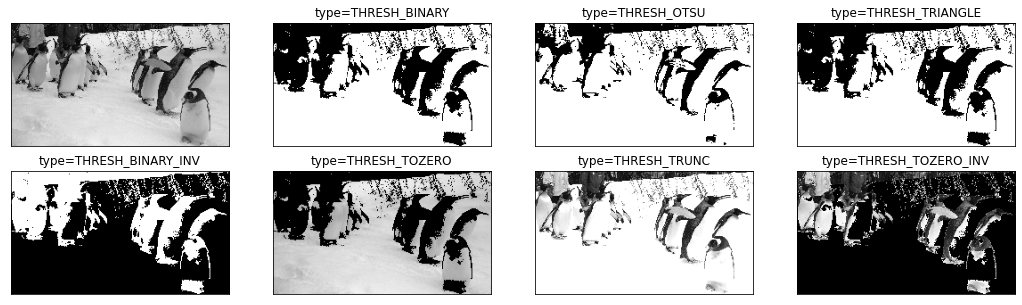

In [10]:
methods = [cv2.THRESH_BINARY, cv2.THRESH_OTSU, cv2.THRESH_TRIANGLE,
           cv2.THRESH_BINARY_INV, cv2.THRESH_TOZERO, cv2.THRESH_TRUNC,
           cv2.THRESH_TOZERO_INV]

method_name = ['THRESH_BINARY', 'THRESH_OTSU', 'THRESH_TRIANGLE',
               'THRESH_BINARY_INV', 'THRESH_TOZERO', 'THRESH_TRUNC',
               'THRESH_TOZERO_INV']

fig, ax = plt.subplots(2, 4, figsize=(18, 5))

ax[0][0].imshow(img_gray, 'gray')
ax[0][0].set_xticks([])
ax[0][0].set_yticks([])

for i in range(1,(len(methods)+1)):
    ret, dst = cv2.threshold(img_gray, 125, 200, methods[i-1])
    ax[i//4][i%4].imshow(dst, 'gray')
    ax[i//4][i%4].set_title('type={}'.format(method_name[i-1]))
    ax[i//4][i%4].set_xticks([])
    ax[i//4][i%4].set_yticks([])

### 適応的2値化処理
閾値を固定せず、画素ごとに変化させる二値化処理。画素毎に異なる閾値を算出する。

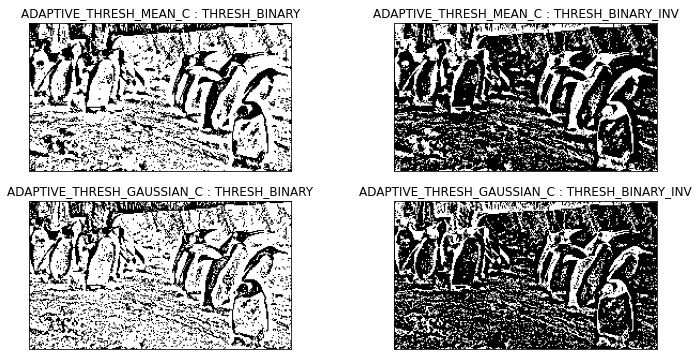

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(12, 6))

methods = [cv2.ADAPTIVE_THRESH_MEAN_C, cv2.ADAPTIVE_THRESH_GAUSSIAN_C]
types = [cv2.THRESH_BINARY,  cv2.THRESH_BINARY_INV]

m_names = ['ADAPTIVE_THRESH_MEAN_C', 'ADAPTIVE_THRESH_GAUSSIAN_C']
t_names = ['THRESH_BINARY',  'THRESH_BINARY_INV']

for i in range(2):
    for j in range(2):
        dst = cv2.adaptiveThreshold(img_gray, 200, methods[i], types[j], 11, 2)
        ax[i][j].imshow(dst, 'gray')
        ax[i][j].set_title('{} : {}'.format(m_names[i], t_names[j]))
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])

# 9-2 2値画像の基本処理と計測
## 9-2-1 連結性
---
注目画素に対して上下左右の画素を**4近傍**と呼び、その近傍に対して注目画素の連結を定義したものを**4連結**と呼ぶ。  
4近傍に斜め方向の近傍を加えたものを**8近傍**と呼び、連結を定義したものを**8連結**と呼ぶ。  
連結している画素の集合は**連結成分**と呼ぶ。  
対象の連結成分のなかにあり、背景に連結していない白画素の集合を、**穴**と呼ぶ。  
例をい以下に示す。4連結では1つの穴、8連結では3つの穴となる。

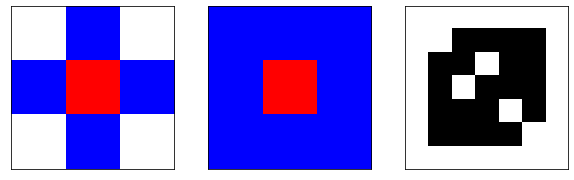

In [32]:
kinbo4 = np.array([[[255,255,255], [0,0,255], [255,255,255]],
                   [[0,0,255], [255,0,0], [0,0,255]],
                   [[255,255,255], [0,0,255], [255,255,255]]])

kinbo8 = np.array([[[0,0,255], [0,0,255], [0,0,255]],
                   [[0,0,255], [255,0,0], [0,0,255]],
                   [[0,0,255], [0,0,255], [0,0,255]]])

ana = np.array([[0,0,0,0,0,0,0],
                [0,0,1,1,1,1,0],
                [0,1,1,0,1,1,0],
                [0,1,0,1,1,1,0],
                [0,1,1,1,0,1,0],
                [0,1,1,1,1,0,0],
                [0,0,0,0,0,0,0]])

fig, ax = plt.subplots(1, 3, figsize=(10, 3))

ax[0].imshow(kinbo4);
ax[0].set_xticks([]);
ax[0].set_yticks([]);

ax[1].imshow(kinbo8);
ax[1].set_xticks([]);
ax[1].set_yticks([]);

ax[2].imshow(-ana, 'gray');
ax[2].set_xticks([]);
ax[2].set_yticks([]);

## 9-2-2 輪郭追跡
---
連結成分の境界を求めることを、**輪郭追跡**と呼ぶ。  
1. **ラスタスキャン**によって、白画素から黒画素に変わる画素を探索する。  
ラスタスキャンとは、画像の左上を起点に、左端から右に画素を調べ、右端についたら行を1つ下がって左端から右に画素を調べる操作である。  
探索した方向を進入方向とする。
2. 進入方向を基点に番号順に右回りに黒画素を探索する。
3. 見つかった黒画素に移動する。黒画素が開始点で、かつ、次の移動点が追跡済みの場合は、処理を終了し、追跡結果を登録する。  
そうでない場合は、2の処理を繰り返す。
  
連結成分の外輪郭の場合、追跡は右回りになり、内輪郭すなわち穴の輪郭の場合は、追跡は左回りとなる。  
輪郭追跡時に、開始点座標と方向コード（注目点右の画素位置を0とし時計回りに7まで）を並べたものを**チェインコード**と呼ぶ。

## 9-2-4 収縮・膨張処理
---
### 収縮
背景または穴に接する対象の画素をひとまわりはぎとる処理を、**収縮**と呼ぶ。  
この処理を繰り返すと、対象の領域は小さくなる。  
この処理で、1つの連結成分が複数に分割されることがある。すなわち、連結性を保持しない処理である。

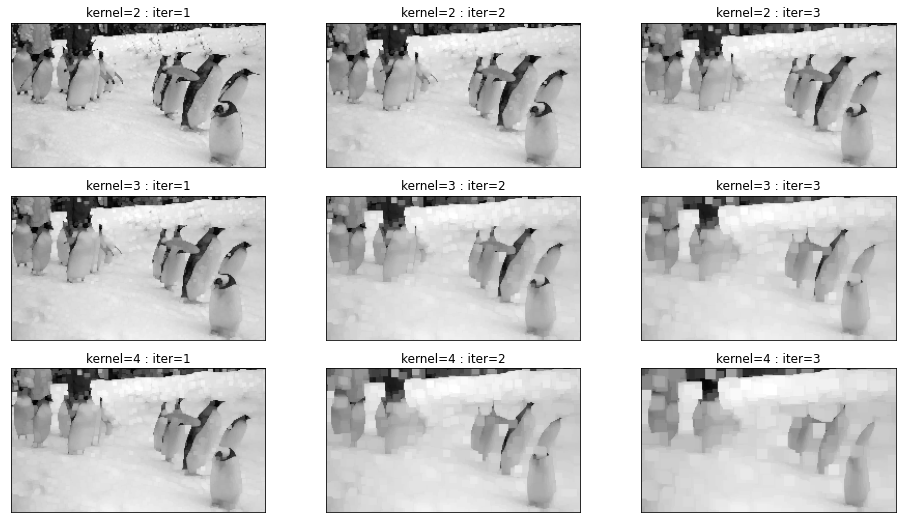

In [38]:
kernels = [2, 3, 4]
iters = [1, 2, 3]

fig, ax = plt.subplots(3, 3, figsize=(16, 9))
for i in range(3):
    for j in range(3):
        kernel = np.ones((kernels[i], kernels[i]), np.uint8)
        dst = cv2.dilate(img_gray, kernel, iterations = iters[j])
        ax[i][j].imshow(dst, 'gray')
        ax[i][j].set_title('kernel={} : iter={}'.format(kernels[i], iters[j]))
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])

### 膨張
背景または穴に接する対象の画素をひとまわり加える処理を、**膨張**と呼ぶ。  
この処理を繰り返すと、穴は小さくなる。  
この処理で、複数の連結成分が1つの連結成分となることがある。すなわち、膨張も連結性を保持しない処理である。

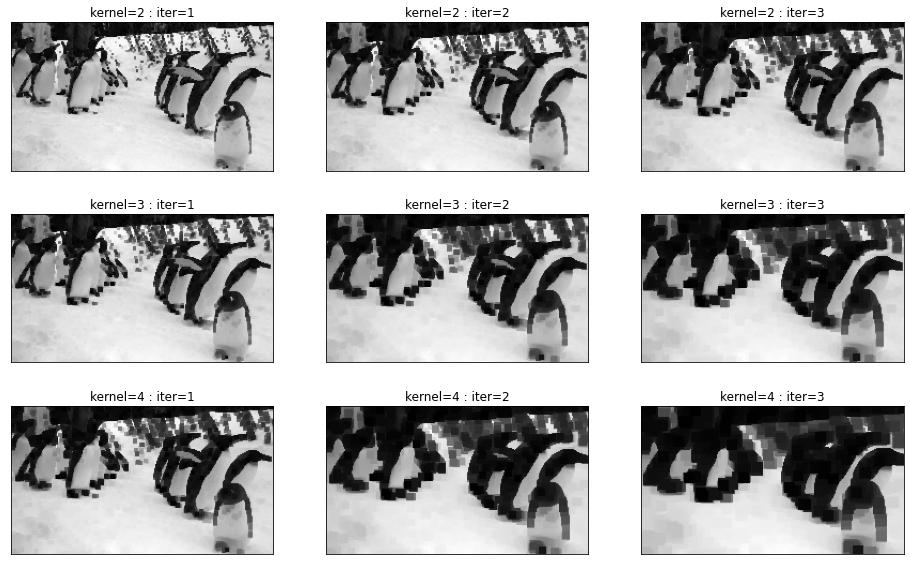

In [39]:
kernels = [2, 3, 4]
iters = [1, 2, 3]

fig, ax = plt.subplots(3, 3, figsize=(16, 10))
for i in range(3):
    for j in range(3):
        kernel = np.ones((kernels[i], kernels[i]), np.uint8)
        dst = cv2.erode(img_gray, kernel, iterations = iters[j])
        ax[i][j].imshow(dst, 'gray')
        ax[i][j].set_title('kernel={} : iter={}'.format(kernels[i], iters[j]))
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])

### クロージング・オープニング
同じ回数膨張して収縮する処理を**クロージング**と呼び、画像中の小さな穴を除くことができる。  
同じ回数収縮して膨張する処理を**オープニング**と呼び、画像中の小さな連悦部分を除くことができる。

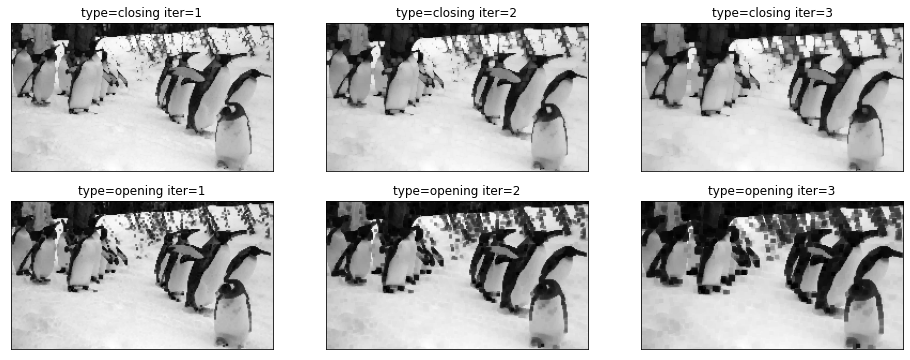

In [42]:
n = [1, 2, 3]

fig, ax = plt.subplots(2, 3, figsize=(16, 6))
for i in range(2):
    for j in range(3):
        kernel = np.ones((2, 2), np.uint8)
        if i == 0:
            dst = cv2.erode(img_gray, kernel, iterations = n[j])
            dst = cv2.dilate(dst, kernel, iterations = n[j])
            typ = 'closing'
        else:
            dst = cv2.dilate(dst, kernel, iterations = n[j])
            dst = cv2.erode(img_gray, kernel, iterations = n[j])
            typ = 'opening'
        ax[i][j].imshow(dst, 'gray')
        ax[i][j].set_title('type={} iter={}'.format(typ, n[j]))
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])

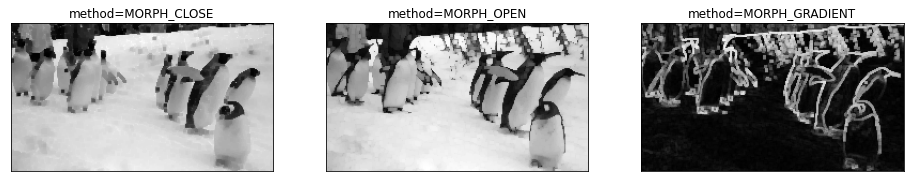

In [43]:
methods = [cv2.MORPH_CLOSE, cv2.MORPH_OPEN, cv2.MORPH_GRADIENT]
method_names = ['MORPH_CLOSE', 'MORPH_OPEN', 'MORPH_GRADIENT']

kernel = np.ones((3,3), np.uint8)

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
for i in range(3):
    dst = cv2.morphologyEx(img_gray, methods[i], kernel)
    ax[i].imshow(dst, 'gray')
    ax[i].set_title('method={}'.format(method_names[i]))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

## 9-2-6 ラベリング
---
同じ連結成分を構成する画素に同じ番号を付け、異なる連結部分を構成する画素に異なる番号を付ける処理を**ラベリング**と呼ぶ。  

### ラスタスキャンによるラベリング
1. ラスタスキャンを行い、ラベルの付いていない画素を調べ、見つかったら注目画素とする。
2. 注目画素の上の画素(または左上の画素)がラベルを持つとき、上の画素(または左上の画素)の(左上の画素)ラベルを注目画素に付ける。  
左の画素(及び上、右上の画素)がラベルを持ち、注目画素のラベルと異なるときルックアップテーブルにそれらのラベルが同一連結成分に属することを記録する。
(右上の画素がラベルを持ち、注目画素のラベルが異なり、かつ右の画素が白画素のとき、ルックアップテーブルに2つのラベルが同一連結成分に属することを記録する。)
3. 注目画素の上の画素(および左上の画素)が白画素で、左の画素がラベルを持つとき、そのラベルを注目画素に付ける。
4. 注目画素の上も左も(左上の画素)も白画素のとき、新しいラベルを注目画素に付ける。
5. 走査する画素がなくなるまで1から繰り返す。

つぎに、再度ラスタスキャンを行い、ルックアップテーブルを参照しながら、同一の連結成分に属するラベル群から、最も小さいラベルを付け直す。
  
### 輪郭追跡によるラベリング
輪郭追跡した外輪郭の結果で、1というラベルが付いているとき、  
ラベル1を除いた連結成分に対して、左上の画素から再度輪郭追跡結果にラベル2を付ける。  
さらに、ラベル2を除いた連結成分に対して、同様の処理を行い、ラベルを付けるべき画素がなくなるまで処理を繰り返す。  
同じ連結成分に付いたラベルを統合して、同じラベル番号を振り直すことによって、ラベリングを行うことができる。

openCVによるラベリング処理

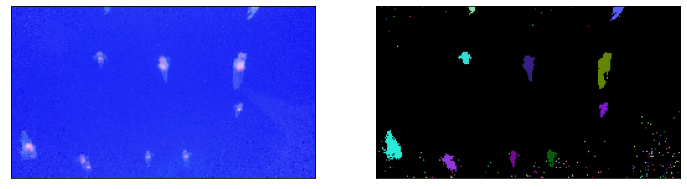

In [50]:
import random

mono_src = cv2.threshold(img_gray2, 86, 255, cv2.THRESH_BINARY)[1].astype('uint8')

ret, markers = cv2.connectedComponents(mono_src)

color_src = img_rgb2.copy()
height, width = mono_src.shape[:2]
colors = []

for i in range(1, ret + 1):
    colors.append(np.array([random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)]))

for y in range(0, height):   
    for x in range(0, width):
        if markers[y, x] > 0:
            color_src[y, x] = colors[markers[y, x]]
        else:
            color_src[y, x] = [0, 0, 0]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img_rgb2);
ax[0].set_xticks([]);
ax[0].set_yticks([]);

ax[1].imshow(color_src);
ax[1].set_xticks([]);
ax[1].set_yticks([]);

ラベリング処理の結果では、ノイズの部分にもラベルが割り振られている。  
ここで、詳しい情報も得られる*cv2.connectedComponentsWithStats*があり、  
面積でフィルタをかけ、ノイズを除く。

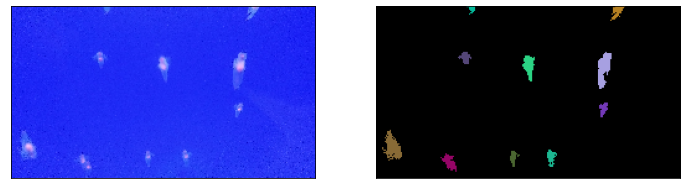

In [52]:
mono_src = cv2.threshold(img_gray2, 86, 255, cv2.THRESH_BINARY)[1].astype('uint8')

nlabels, labeling, contours, CoGs = cv2.connectedComponentsWithStats(mono_src)

color_src = img_rgb2.copy()
height, width = mono_src.shape[:2]
colors = []

for i in range(1, nlabels + 1):
    colors.append(np.array([random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)]))

for y in range(0, height):   
    for x in range(0, width):
        if labeling[y, x] > 0:
            _,_,_,_,size = contours[labeling[y, x]]
            if size >= 20:
                color_src[y, x] = colors[labeling[y, x]]
            else:
                color_src[y, x] = [0, 0, 0]
        else:
            color_src[y, x] = [0, 0, 0]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img_rgb2);
ax[0].set_xticks([]);
ax[0].set_yticks([]);

ax[1].imshow(color_src);
ax[1].set_xticks([]);
ax[1].set_yticks([]);         

## 9-2-7 形状特徴パラメータ
---
2値化画像中の連結成分は、形状の特徴によって分類できる。この特徴を数値化したものを**形状特徴パラメータ**と呼ばれる。

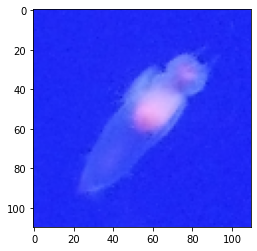

In [151]:
img_bgr2 = cv2.imread("C:/Users/akihiro.tanaka.CORP/Downloads/pictures/crione.jpg")
h, w = img_bgr2.shape[:2]
scale = (640 * 480 / (w * h))*6
img_bgr_resize2 = cv2.resize(img_bgr2, dsize=None, fx=scale, fy=scale)
img_rgb2 = cv2.cvtColor(img_bgr_resize2, cv2.COLOR_BGR2RGB)
img_gray2 = cv2.cvtColor(img_bgr_resize2, cv2.COLOR_BGR2GRAY)

h, w = img_rgb2.shape[:2]
affine_trans = cv2.getRotationMatrix2D((h//2,w//2), -30.0, 1.0)
dst = cv2.warpAffine(img_rgb2, affine_trans, (w, h))
img_tmp_rgb = dst[285:395,535:645,:]
img_tmp_gray = cv2.cvtColor(img_tmp_rgb, cv2.COLOR_BGR2GRAY)
plt.imshow(img_tmp_rgb)

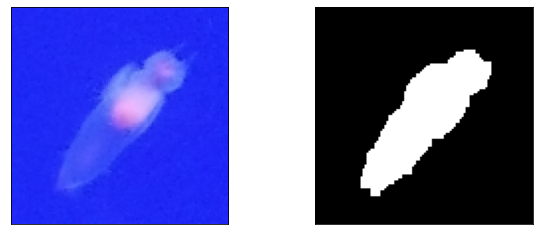

In [230]:
img_g = img_tmp_gray.copy()
img_c = img_tmp_rgb.copy()

# 2値化
ret, thresh = cv2.threshold(img_g,110,255,cv2.THRESH_BINARY)

# 膨張・収縮処理
kernel = np.ones((3, 3), np.uint8)
thresh = cv2.erode(thresh, kernel, iterations = 2)
thresh = cv2.dilate(thresh, kernel, iterations = 3)
thresh = cv2.erode(thresh, kernel, iterations = 1)

# 輪郭の抽出
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 輪郭の特徴(モーメント)の算出
cnt = contours[0]
M = cv2.moments(cnt)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].imshow(img_tmp_rgb);
ax[0].set_xticks([]);
ax[0].set_yticks([]);

ax[1].imshow(thresh, 'gray');
ax[1].set_xticks([]);
ax[1].set_yticks([]); 

### 重心
連結成分の画素に等しい重さがあると仮定したときの、図形全体の重さの中心

In [231]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(cx, cy)

54 55


### 面積
連結成分を構成する画素の数

In [232]:
area = cv2.contourArea(cnt)
area

1975.0

### 周囲長
輪郭追跡し一周する移動量

In [235]:
perimeter = cv2.arcLength(cnt,True)
perimeter

233.82337427139282

### 円形度
図形がどれだけ円に近いかを表す尺度。円に近いほど1に近づく。
$$4\pi S/L^2$$

In [234]:
roundness = 4*np.pi*area / perimeter**2
roundness

0.45394278424597106

### オイラー数
連結成分の数から穴の数を引いたもの

### 主軸
画素の位置に重み付けをして合計した数値である、**モーメント特徴**を利用して主軸方向を求めることができる。
$$
    \theta=\frac{1}{2}\tan^{-1}(\frac{2M(1,1)}{M(2,0)-M(0,2)})
$$

In [236]:
theta=-0.5*np.arctan((2*M['m11'])/(M['m20']-M['m02'])) * 180/np.pi
theta

44.121416641164615

### 外輪郭・外接長方形・外接円・主軸

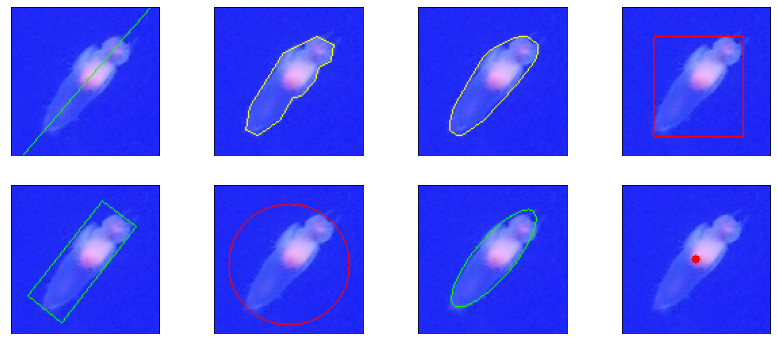

In [272]:
fig, ax = plt.subplots(2, 4, figsize=(14, 6))

# 主軸
img_c1 = img_c.copy()
rows,cols = img_c1.shape[:2]
[vx, vy, x, y] = cv2.fitLine(cnt, cv2.DIST_L2, 0, 0.01, 0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
dst = cv2.line(img_c1, (cols-1, righty), (0, lefty), (0, 255, 0), 1)

ax[0][0].imshow(dst);
ax[0][0].set_xticks([]);
ax[0][0].set_yticks([]);

# 外輪郭1
img_c1 = img_c.copy()
epsilon = 0.01*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
dst = cv2.polylines(img_c1, [approx], True, (255, 255, 0))

ax[0][1].imshow(dst);
ax[0][1].set_xticks([]);
ax[0][1].set_yticks([]);

# 外輪郭2(凸包(Convex Hull))
img_c1 = img_c.copy()
hull = cv2.convexHull(cnt)
dst = cv2.polylines(img_c1, [hull], True, (255, 255, 0))

ax[0][2].imshow(dst);
ax[0][2].set_xticks([]);
ax[0][2].set_yticks([]);

# 外接長方形
img_c1 = img_c.copy()
x,y,w,h = cv2.boundingRect(cnt)
img_rect = cv2.rectangle(img_c1, (x, y), (x+w, y+h), (255, 0, 0), 1)

ax[0][3].imshow(img_rect);
ax[0][3].set_xticks([]);
ax[0][3].set_yticks([]);

# 回転を考慮した外接長方形
img_c1 = img_c.copy()
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
img_rot_rect = cv2.drawContours(img_c1, [box], 0, (0, 255, 0), 1)

ax[1][0].imshow(img_rot_rect);
ax[1][0].set_xticks([]);
ax[1][0].set_yticks([]);

# 外接円
img_c1 = img_c.copy()
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img_circle = cv2.circle(img_c1, center, radius, (255, 0, 0), 1)

ax[1][1].imshow(img_circle);
ax[1][1].set_xticks([]);
ax[1][1].set_yticks([]);

# 外接楕円
img_c1 = img_c.copy()
ellipse = cv2.fitEllipse(cnt)
img_ellipse = cv2.ellipse(img_c1, ellipse, (0, 255, 0), 1)

ax[1][2].imshow(img_ellipse);
ax[1][2].set_xticks([]);
ax[1][2].set_yticks([]);

# 重心
img_c1 = img_c.copy()
img_center = cv2.circle(img_c1, (cx,cy), 3, (255, 0, 0), -1)

ax[1][3].imshow(img_center);
ax[1][3].set_xticks([]);
ax[1][3].set_yticks([]);

## 9-2-8 距離と距離変換画像
---
### 距離の定義
2つの画素$A(x_{a},y_{a})$と$B(x_{b},y_{b})$の間の距離は、経路の制約によって以下のような定義がある。  
ユークリッド距離：$\sqrt{(x_{a}-x_{b})^2+(y_{a}-y_{b})^2}$  
市街地距離：$|x_{a}-x_{b}|+|y_{a}-y_{b}|$  
チェス盤距離：$max(|x_{a}-x_{b}|,|y_{a}-y_{b}|)$  
**ユークリッド距離**は、AとBを直線で結んだ距離、**市街地距離**は、4近傍距離とも呼び上下左右の4近傍の移動経路による距離である。  
**チェス盤距離**ｈ、8近傍距離とも呼び、8近傍の移動経路による距離である。

### 距離変換画像
連結成分の各画素の背景からの最短距離を与える変換を**距離変換**と呼び、変換後の画像を**距離変換画像**と呼ぶ。

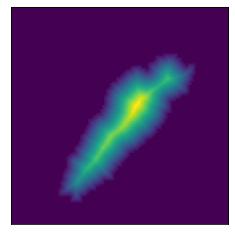

In [275]:
img_g1 = img_g.copy()
ret, thresh = cv2.threshold(img_g1,110,255,cv2.THRESH_BINARY)

kernel = np.ones((2, 2), np.uint8)
thresh = cv2.erode(thresh, kernel, iterations = 2)
thresh = cv2.dilate(thresh, kernel, iterations = 3)

dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
plt.imshow(dist_transform)
plt.xticks([]);
plt.yticks([]);

# 9-3 線画像のベクトル化
## 9-3-1 ベクトル化の流れ
---
連結成分の連結性を保存したまま画素を削る処理を**細線化**と呼ぶ。  
細線化された2値画像の画素は、特徴点である**端点**、**分岐点**、**通過点**の3種類に分類される。  
図に例を示す。赤い点が端点、緑色が分岐点、青の点が通過点を表している。

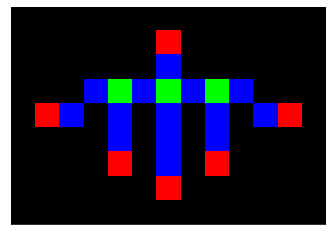

In [295]:
blue=np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,255,0,0,0,0,0,0],
               [0,0,0,255,0,255,0,255,0,255,0,0,0],
               [0,0,255,0,255,0,255,0,255,0,255,0,0],
               [0,0,0,0,255,0,255,0,255,0,0,0,0],
               [0,0,0,0,0,0,255,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0]])

green=np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,255,0,255,0,255,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0]])

red =np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,255,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,255,0,0,0,0,0,0,0,0,0,255,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,255,0,0,0,255,0,0,0,0],
               [0,0,0,0,0,0,255,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0]])

tmp_re = cv2.merge([red, green, blue])

plt.imshow(tmp_re);
plt.xticks([]);
plt.yticks([]);

## 9-3-2 細線化手法
---
対象を黒画素、背景を白画素とする。  
注目画素を中心に3×3の画素値のパターンを観測し、注目画素が以下の3つの条件を満たすとき、その値を白画素にする。  
1. 境界上にある黒画素であること。
2. 白画素に変更しても連結性が保持されること。
3. 端点でないこと。
画素値を更新する方法には、逐次法と並列法がある。  
**逐次法**は、更新した結果を用いて、すぐに次の処理を行う。  
**並列法**は、消去可能かどうかを検証する画像と更新を行う画像を別々に持ち、更新用画像に処理結果を反映していく。

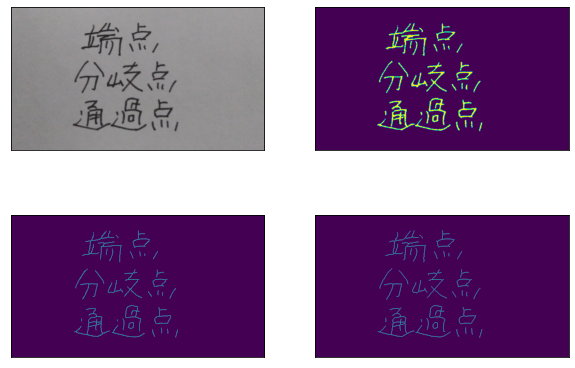

In [617]:
ret, thresh = cv2.threshold(img_gray3, 100, 255, cv2.THRESH_BINARY_INV)
#thresh = cv2.dilate(thresh, kernel, iterations = 1)
thresh = cv2.erode(thresh, kernel, iterations = 1)
#thresh = cv2.dilate(thresh, kernel, iterations = 1)


skeleton1   =   cv2.ximgproc.thinning(thresh, thinningType=cv2.ximgproc.THINNING_ZHANGSUEN)
skeleton2   =   cv2.ximgproc.thinning(thresh, thinningType=cv2.ximgproc.THINNING_GUOHALL)

fig, ax = plt.subplots(2, 2, figsize=(10, 7))

ax[0][0].imshow(img_rgb3);
ax[0][0].set_xticks([]);
ax[0][0].set_yticks([]);

ax[0][1].imshow(thresh);
ax[0][1].set_xticks([]);
ax[0][1].set_yticks([]);

ax[1][0].imshow(skeleton1);
ax[1][0].set_xticks([]);
ax[1][0].set_yticks([]);

ax[1][1].imshow(skeleton2);
ax[1][1].set_xticks([]);
ax[1][1].set_yticks([]);

## 9-3-2 細線の特徴点の抽出
---
細線化処理の結果は、端点、分岐点、孤立点、通過点の特徴量に分類される。  
特徴点と特徴点によって区切られた画素列を、**セグメント**と呼ぶ。

In [512]:
tanten1 = np.array([[[0,0,0], [0,255,0], [0,255,0]],
                    [[0,0,0], [0,255,0], [0,255,255]],
                    [[0,0,0], [0,255,0], [255,255,0]],
                    [[0,0,0], [0,255,0], [255,255,255]]])

tanten2 = np.array([[0,0,0], [0,255,0], [255,0,0]])

tmp1 = np.array([[np.rot90(tanten1[j], i) for i in range(4) for j in range(4)]]).reshape([16,3,3]).astype('uint8')
tmp2 = np.array([[np.rot90(tanten2, i) for i in range(4)]]).reshape([4,3,3]).astype('uint8')
tanten = np.concatenate([tmp1,tmp2],axis=0)
tanten.shape

(20, 3, 3)

In [513]:
bunki3_1 = np.array([[[0,255,0], [255,255,255], [0,0,0]],
                    [[255,255,0], [255,255,255], [0,0,0]],
                    [[0,255,255], [255,255,255], [0,0,0]],
                    [[255,255,255], [255,255,255], [0,0,0]]])

bunki3_2 = np.array([[255,0,0], [0,255,0], [255,0,255]])

tmp1 = np.array([[np.rot90(bunki3_1[j], i) for i in range(4) for j in range(4)]]).reshape([16,3,3]).astype('uint8')
tmp2 = np.array([[np.rot90(bunki3_2, i) for i in range(4)]]).reshape([4,3,3]).astype('uint8')
bunki3 = np.concatenate([tmp1,tmp2],axis=0)
bunki3.shape

(20, 3, 3)

In [549]:
tmp1=np.array([[np.rot90(np.array([[255,255,0],[255,255,255],[0,255,0]]), i) for i in range(4)]]).reshape([4,3,3])
tmp2=np.array([[np.rot90(np.array([[255,255,255],[255,255,255],[0,255,0]]), i) for i in range(4)]]).reshape([4,3,3])
tmp3=np.array([[np.rot90(np.array([[255,255,255],[255,255,255],[255,255,0]]), i) for i in range(4)]]).reshape([4,3,3])
tmp4=np.array([[255,255,255],[255,255,255],[255,255,255]]).reshape([1,3,3])
tmp5=np.array([[0,255,0],[255,255,255],[0,255,0]]).reshape([1,3,3])
bunki4=np.concatenate([tmp1,tmp2],axis=0)
bunki4=np.concatenate([bunki4,tmp3],axis=0)
#bunki4=np.concatenate([bunki4,tmp4],axis=0)
bunki4=np.concatenate([bunki4,tmp5],axis=0).astype('uint8')

koritsu=np.array([[0,0,0],[0,255,0],[0,0,0]]).reshape([1,3,3]).astype('uint8')
bunki4.shape

(13, 3, 3)

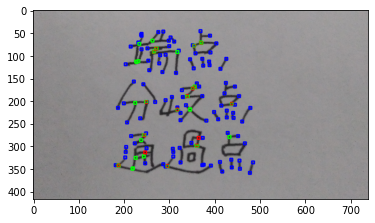

In [621]:
dst = img_rgb3.copy()
test = skeleton2.copy()
threshold = 0.8

for i in range(20):
    templ = tanten[i]
    result = cv2.matchTemplate(test, templ, cv2.TM_CCOEFF_NORMED)
    loc = np.where(result >= 0.9)

    for pt in zip(*loc[::-1]):
        cv2.rectangle(dst, (pt[0]-templ.shape[1],pt[1]-templ.shape[0]), (pt[0] + templ.shape[1], pt[1] + templ.shape[0]), (0,0,255), 2)

for i in range(20):
    templ = bunki3[i]
    result = cv2.matchTemplate(test, templ, cv2.TM_CCOEFF_NORMED)
    loc = np.where(result >= 0.8)

    for pt in zip(*loc[::-1]):
        cv2.rectangle(dst, (pt[0]-templ.shape[1],pt[1]-templ.shape[0]), (pt[0] + templ.shape[1], pt[1] + templ.shape[0]), (0,255,0), 2)

for i in range(13):
    templ = bunki4[i]
    result = cv2.matchTemplate(test, templ, cv2.TM_SQDIFF_NORMED)
    loc = np.where(result <= 0.4)

    for pt in zip(*loc[::-1]):
        cv2.rectangle(dst, (pt[0]-templ.shape[1],pt[1]-templ.shape[0]), (pt[0] + templ.shape[1], pt[1] + templ.shape[0]), (255,0,0), 1)

plt.imshow(dst)

## 9-3-4 ベクトル化
---
画素列であるセグメントを線分近似し、**CAD**システムで扱える線分の始終点の座標列に変換することを**ベクトル化**と呼ぶ。